In [48]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import imageio
import matplotlib.pyplot as plt
from pointpats import PointPattern
from pointpats.centrography import mean_center, weighted_mean_center, std_distance
from mpl_toolkits import mplot3d

In [49]:
Dados = (r"C:\Users\Lizi\Python\Centrografia_GIF\Dados\\")
Output = (r"C:\Users\Lizi\Python\Centrografia_GIF\Output\\")
acidentes2018 = gpd.read_file(Dados+"ano_2018.shp")
poa_lim = gpd.read_file(Dados+"poa_lim.shp")
ruas = gpd.read_file(Dados+"eixos.shp")

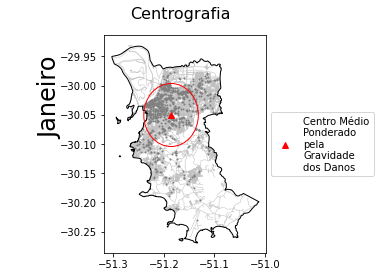

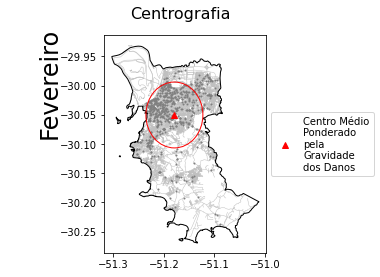

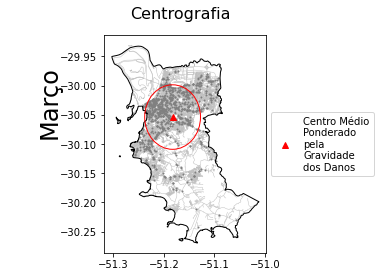

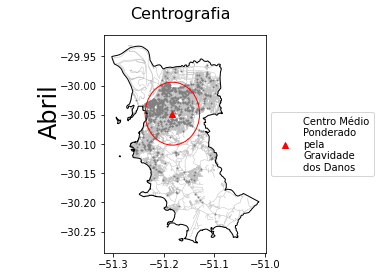

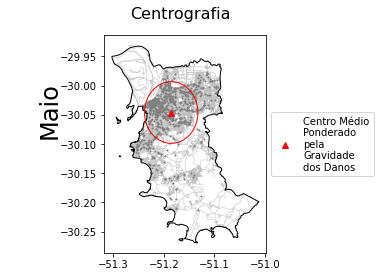

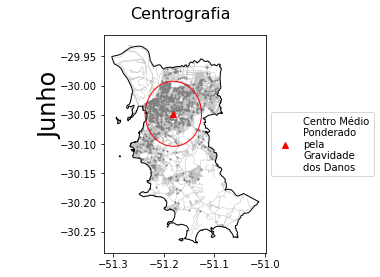

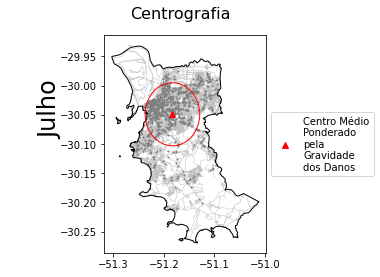

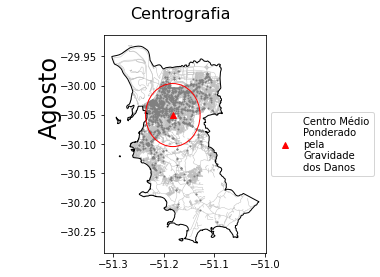

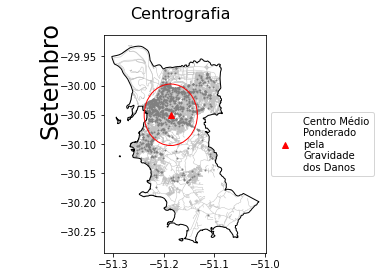

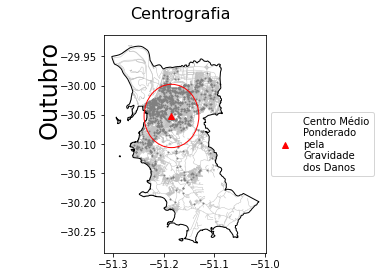

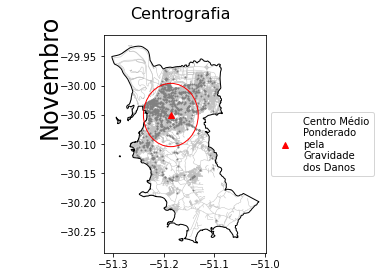

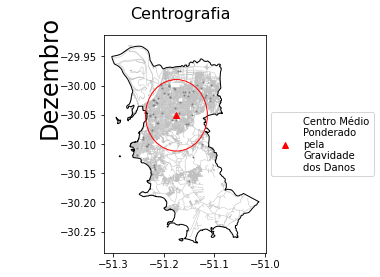

In [83]:
lista_mes = acidentes2018['mes'].unique()
meses = ["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro","Novembro","Dezembro"]
colunas_selecionadas = ['longitude','latitude']

i = 0
images = []

for mes in lista_mes:
    
    acidentes2018a = acidentes2018[acidentes2018.mes == mes]
    
   
    acidentes2018b = acidentes2018a.filter(items=colunas_selecionadas)
    
    points = pd.DataFrame(acidentes2018b)

    points[['longitude', 'latitude']].to_numpy()


    pesosa = ['ups']
    pesos = pd.DataFrame(acidentes2018a.filter(items=pesosa))


    #Centrografia
    pp = PointPattern(points) 
    pp.points
    
    #Media ponderada
    mediapond = weighted_mean_center(pp.points, pesos)
    mediapond
    
    #Standard Distance
    stdd = std_distance(pp.points)
    stdd
    
    #Plot    
    base = poa_lim.plot(color='None', edgecolor='black', zorder=10)
    ruasa = ruas.plot(ax=base, color = 'silver', linewidth=0.5, zorder=5)
    pontos = acidentes2018a.plot(ax=base, color = 'grey', marker='o', markersize=1, zorder=8)

    circle = plt.Circle((mediapond[0], mediapond[1]),stdd,fill=False, color='r', label='2', zorder=10)

    plt.plot(mediapond[0], mediapond[1], 'r^', label='Centro Médio\nPonderado\npela\nGravidade\ndos Danos', zorder=10)

    plt.gcf().gca().add_artist(circle)
   
    plt.suptitle('Centrografia', fontsize=16)

    plt.legend(numpoints=1, facecolor='white',loc='center left', bbox_to_anchor=(1, 0.5))
    
    base.annotate(meses[i],
    xy=(.1, .5), xycoords='figure fraction',
    horizontalalignment='left', rotation=90, verticalalignment='bottom',
    fontsize=24)
      
    filepath = os.path.join(Output, meses[i]+'_centrografia.jpg')
    chart = base.get_figure()
    chart.savefig(filepath, dpi=300)
        
    images.append(imageio.imread(filepath))
    imageio.mimsave('Output'+'\movie.gif', images, fps=1)
    
    i = i+1 
    